## Goals
- implement the model $f_{w,b}$ for linear regression with one variable
- implement and explore the cost function for linear regression with one variable.

# 1. Model Representation

## Notation
Here is a summary of some of the notation you will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets  | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


## Tools
In this assignment you will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement

As in the lecture, you will use the motivating example of diabetes progression prediction. This assignment will use a simple data set with only two data points shown below. These two points will constitute our *data or training set*. 

| BMI                      | Diabetes progression |
| -------------------------| ------------------------ |
| 32.1                   | 151                      |
| 21.6                   | 75                      |

You would like to fit a linear regression model through these two points, so you can then predict diabetes progression for other patients - say, a patient with BMI = 30.5.


Please run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [10]:
# x_train is the input variable (BMI) 
# y_train is the target (diabetes progression level)
x_train = np.array([32.1, 21.6])
y_train = np.array([151, 75])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [32.1 21.6]
y_train = [151  75]


>**Note**: The course will frequently utilize the python 'f-string' output formatting described [here](https://docs.python.org/3/tutorial/inputoutput.html) when printing. The content between the curly braces is evaluated when producing the output.

### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [11]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


One can also use the Python `len()` function as shown below.

In [12]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (32.1, 151) and (x$^{(1)}$, y$^{(1)}$) is (21.6, 75). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Finish the next code block below to get the $i^{th}$ training example.

In [13]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]             # ith feature value  
y_i = y_train[i]             # ith target value
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (32.1, 151)


### Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

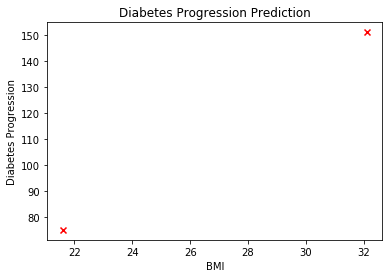

In [14]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Diabetes Progression Prediction")
# Set the y-axis label
plt.ylabel('Diabetes Progression')
# Set the x-axis label
plt.xlabel('BMI')
plt.show()

## Model function

As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 1$ and $b = 1$. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [82]:
w = 7.25
b = -82
print(f"w: {w}")
print(f"b: {b}")

w: 7.25
b: -82


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [83]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    # write a loop to compute f_wb
    for i in range(len(f_wb)):
        f_wb[i] = w * x[i] + b
    
    
        
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

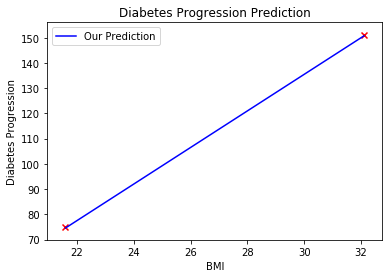

In [84]:
tmp_f_wb = compute_model_output(x_train, w, b)                       # call the compute_model_output function

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Diabetes Progression Prediction")
# Set the y-axis label
plt.ylabel('Diabetes Progression')
# Set the x-axis label
plt.xlabel('BMI')

plt.legend()
plt.show()

As you can see, setting $w = 1$ and $b = 1$ does *not* result in a line that fits our data. 

### Prediction
Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data? Note that you can actually compute the theorectical values of $w$ and $b$ by hand given the two training examples. Put your best $w$ and $b$ in the prediction cell below.

Now that we have a model, we can use it to make our original prediction. Let's predict the diabetes progression of a patient with BMI=30.5. Note: your prediction value should be around 140.


In [89]:
w = 7.25              # Your best w               
b = -82             # Your best b
x_i = 30.5
diabetes_progression = w * x_i + b             # prediction

print(f"${diabetes_progression:.1f}")

$139.1


# 2. Cost Function 
Here, cost is a measure of how well our model is predicting the diabetes progression of a patient. 

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{2}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{3}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [94]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    
    # write a loop to compute the summation of the squred difference for all training exmaples

    cost_sum = sum([((w * x[i] + b) - y[i])**2 for i in range(m)])
        
    
    
    
    
    
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

Test your compute_cost function using x_train, y_train, and your best $w$ and $b$. Your total cost should be around 0.

In [95]:
total_cost = compute_cost(x_train, y_train, w, b)                        # call compute_cost function
print(f"Total cost is: {total_cost:.1f}")

Total cost is: 0.1


Redefine your x_train and y_train using a larger training set below. Test your compute_cost function again.

| BMI                      | Diabetes progression |
| -------------------------| ------------------------ |
| 32.1                   | 151                      |
| 21.6                   | 75                      |
| 30.5                   | 141                      |
| 22.6                   | 97                      |

In [97]:
x_train = np.array([32.1, 21.6, 30.5, 22.6])
y_train = np.array([151, 75, 141, 97])
total_cost = compute_cost(x_train, y_train, w, b)                        # call compute_cost function
print(f"Total cost is: {total_cost:.1f}")

Total cost is: 29.2
